In [1]:
from dolo import *
from matplotlib import pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
model = yaml_import("../models/consumption_savings_iid.yaml")

TypeError: dict expected at most 1 argument, got 2

In [3]:
dr = time_iteration(model)

---------------------------------------------------
| Start Time Iterations.                          |
---------------------------------------------------
| N    | Error     | Gain      | Time      | nit  |
---------------------------------------------------
|    1 | 8.900e-01 |       nan | 1.213e+00 |    5 |
|    2 | 4.769e-03 | 5.359e-03 | 1.135e-02 |    4 |
|    3 | 4.795e-03 | 1.005e+00 | 9.564e-03 |    4 |
|    4 | 4.818e-03 | 1.005e+00 | 1.075e-02 |    5 |
|    5 | 4.843e-03 | 1.005e+00 | 1.326e-02 |    5 |
|    6 | 4.870e-03 | 1.006e+00 | 1.032e-02 |    5 |
|    7 | 4.894e-03 | 1.005e+00 | 9.549e-03 |    5 |
|    8 | 4.921e-03 | 1.005e+00 | 1.228e-02 |    5 |
|    9 | 4.947e-03 | 1.005e+00 | 1.009e-02 |    4 |
|   10 | 4.973e-03 | 1.005e+00 | 9.362e-03 |    4 |
|   11 | 4.999e-03 | 1.005e+00 | 1.181e-02 |    5 |
|   12 | 5.024e-03 | 1.005e+00 | 9.403e-03 |    4 |
|   13 | 5.051e-03 | 1.005e+00 | 1.077e-02 |    4 |
|   14 | 5.077e-03 | 1.005e+00 | 8.254e-03 |    4 |
|   15 | 5.1

One can also try the faster version

## Stochastic Simulations

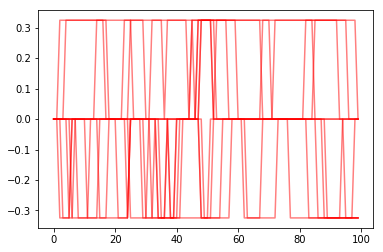

In [115]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [116]:
sim = simulate(model, dr, i0=1, N=100)

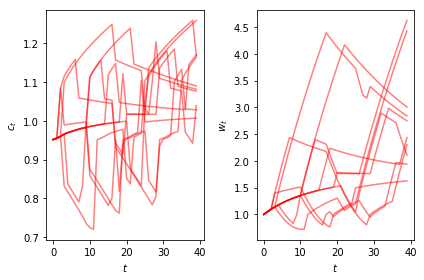

In [117]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [118]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Text(0.5, 0, '$w$')

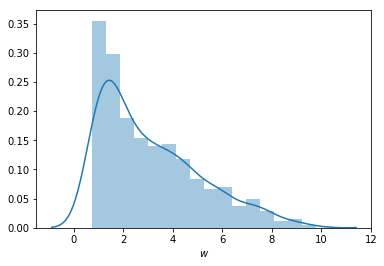

In [119]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [120]:
tab = tabulate(model, dr,'w')

In [121]:
from matplotlib import pyplot as plt

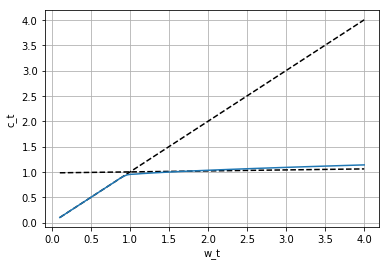

In [122]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()